<h1 style="font-family:verdana;">LONDON BIKE SHARING</h1>

<img src="cycyling.jpeg" alt="Girl in cycyling" width="500" height="600">

Appenddix
-click on the link:
>1. <a href=#Imports> Imports</a>
>2. <a href=#Load> Load Data</a>
>3. <a href=#Formating> Data Formating</a>
>4. <a href=#valid> Validate Assumption(option If exist)</a>
>5. <a href=#EDA1> Exploratory Date Analysis(Uni-varible)</a>
>6. <a href=#EDA2> Exploratory Date Analysis(muli-varible-relationships)</a>
>7. <a href=#ques> Questions& Insights</a>
>8. <a href=#con> Conculsion</a>

### Company Background:

The London Public Bike Scheme is a great way to get around the city, and getting started is very easy: just rent a bike, ride it wherever you want, and return it to any of the docking stations around the city.
bike-sharing company
The London Cycling Infrastructure Database (CID) is the world's largest and most comprehensive database of cycling infrastructure, containing extensive infrastructure details and weather news in the capital.

### MOTIVATIONS:

The purpose is to try to find out the effect of the weather and the seasons on the number of bike shares.

### DESCRIBE DATA:

I used the data I got from this website https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset

I have 10 column and more than 17,000 rows.

timestamp : timestamp field for data collection
cnt : number of new bike posts
t1 : true temperature in C
t2:  temperature in C "looks like"
hum : humidity
windspeed : wind speed km/h
Weather_code : weather category
Description of the "weather_code" class:
1 = clear; Mostly clear but some values with fog/fog/fog patches/fog in the vicinity 2 = scattered clouds / few clouds 3 = intermittent clouds 4 = cloudy 7 = rain / light showers / light rain 10 = stormy rain Thunder 26 = Snow 94 = Freezing Fog 
Holiday :Boolean field - 1 holiday / 0 non-holiday
isweekend : Boolean field - 1 if today is a weekend
Season : the category of field meteorological seasons: zero-spring; 1- Summer 2- Fall 3- Winter.

### THE OBJECTIVE:

o	Find the size of the data.

o	Describe data .

o	Find from the data what the weather was like when the polytheists had the highest value.

o	Find out from the data what day was when the polytheists had the least value.

o	Find out from the data what is the right time (polytheists had the highest value) for each Season.

o	What is the number of idolaters when the actual temperature is equal to the feeling of heat.

o	Find the visualization of the  number of idolaters in each Season.





## <a name=#Imports style=" font-size:150%;"> Helper Functions:</a>

In [1]:
def print_nas(df,cutoff):
    size=len(df)
    drop_col_list=[]
    
    for col in df.columns.to_list():
        num_nas=sum(df[col].isna())
        na_perc=round((num_nas/size)*100.00,2)
        print(col,":",num_nas,",",na_perc,"%")
        if na_perc>=cutoff:
            drop_col_list.append(col)
    visual_NA(df,True)
    return  drop_col_list


def visual_NA(dfina,col:bool):
    len_dfina=len(dfina)
    
    
    if col is True :
        (dfina.isna().sum()/len_dfina*100.00).hist()
        plt.title("Frequency for NAs in row")
        plt.xlabel("Percentage for NAs")
        plt.ylabel("Frequency ")
                
def dealing_out_of_outliers(col):
    Q3 = np.percentile(col, 75)
    Q1 = np.percentile(col, 25)
    IQR = Q3 - Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    outlier=[]
    for x in col:
        if ((x > upper) ^(x < lower)):
            outlier.append(x)
    print("out in the dataset is",outlier)
    col.plot(kind = 'box')


    
    
def infolimt(col):
    Q3 = np.percentile(col, 75)
    Q1 = np.percentile(col, 25)
    IQR = Q3 - Q1
    lower = (Q1-1.5)*IQR
    upper = (Q3+1.5)*IQR
    print("Interquartile range of the cnt is:",IQR,"and the upper lmit is ",upper,"and the lower lmit is",lower)
 



## <a name=#Imports style=" font-size:150%;"> Libraries Imports </a>

In [2]:
print("Importing ......",end="",flush=True)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import math as m
%matplotlib inline
import sys 
import os
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import sklearn.neural_network as nn

#supper warnings
import warnings
warnings.filterwarnings('ignore')
print("[Done]")

Importing ......[Done]


## <a name=#Load> Load Data</a>

In [3]:
sys.path.append("Desktop/LONDON-BIKE-SHARING-/London**.ipynb")

In [4]:
df = pd.read_csv("london_merged.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
#the size of my data
df.size

174140

In [8]:
df.shape

(17414, 10)

In [9]:
print("Number of missing values in the data", df.isnull().sum().sum())

Number of missing values in the data 0


## <a name=#Formating> Data Formating</a>

In [10]:
my_data = df.copy()

In [11]:
my_data['timestamp'] = pd.to_datetime(my_data['timestamp'])

In [12]:
#Separate year, month, day, weekday, hour from timestamp
my_data["year"] = my_data['timestamp'].dt.year
my_data["month"] = my_data['timestamp'].dt.month
my_data["day_of_month"] = my_data['timestamp'].dt.day
my_data["day_of_week"] = my_data['timestamp'].dt.weekday
my_data["hour"] = my_data['timestamp'].dt.hour
my_data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6,4


In [13]:
my_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0
year,17414.0,2015.507810,0.508157,2015.0,2015.0,2016.0,2016.00,2017.0


In [14]:
#converting type to int 
my_data.is_weekend = my_data.is_weekend.astype(int)
my_data.is_holiday = my_data.is_holiday.astype(int)
my_data.weather_code = my_data.weather_code.astype(int)
my_data.season = my_data.season.astype(int)

In [15]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  int64         
 7   is_holiday    17414 non-null  int64         
 8   is_weekend    17414 non-null  int64         
 9   season        17414 non-null  int64         
 10  year          17414 non-null  int64         
 11  month         17414 non-null  int64         
 12  day_of_month  17414 non-null  int64         
 13  day_of_week   17414 non-null  int64         
 14  hour          17414 non-null  int64         
dtypes: datetime64[ns](1), float64(4), in

In [16]:
my_data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,2015,1,4,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,2015,1,4,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,2015,1,4,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3,2015,1,4,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3,2015,1,4,6,4


In [17]:
my_data.drop(["timestamp"], axis = 1, inplace = True)

In [18]:
my_data.shape  

(17414, 14)

## <a name=#valid> Validate Assumption(option If exist)</a>

In [19]:
my_data.duplicated().sum()

0

In [20]:
my_data.isnull()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17410,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17411,False,False,False,False,False,False,False,False,False,False,False,False,False,False
17412,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
my_data["season"].value_counts()

0    4394
1    4387
3    4330
2    4303
Name: season, dtype: int64

In [22]:
my_data["weather_code"].value_counts()

1     6150
2     4034
3     3551
7     2141
4     1464
26      60
10      14
Name: weather_code, dtype: int64

In [23]:
my_data["is_holiday"].value_counts()

0    17030
1      384
Name: is_holiday, dtype: int64

In [24]:
my_data["is_weekend"].value_counts()

0    12444
1     4970
Name: is_weekend, dtype: int64

In [25]:
my_data["year"].value_counts()

2016    8699
2015    8643
2017      72
Name: year, dtype: int64

In [26]:
my_data["month"].value_counts()

5     1488
1     1487
8     1484
12    1484
7     1481
10    1479
3     1468
4     1438
11    1430
6     1422
9     1394
2     1359
Name: month, dtype: int64

In [27]:
my_data["day_of_week"].value_counts()

0    2508
1    2505
6    2505
3    2492
2    2489
5    2465
4    2450
Name: day_of_week, dtype: int64

In [28]:
my_data["hour"].value_counts()

16    730
15    729
12    729
14    728
17    728
13    728
18    728
19    727
11    727
20    727
9     727
7     726
6     726
21    726
22    725
10    725
8     724
1     724
0     724
23    722
5     721
4     721
3     721
2     721
Name: hour, dtype: int64

In [29]:
my_data["cnt"].nunique()

3781

In [30]:
#to colcalate the nunique of each col
for col in my_data.columns.to_list():
    num_uniq= my_data[col].nunique()
    if num_uniq <=10:
        uniq_list=my_data[col].nunique()
    else:
         uniq_list="more than 10"
    print(col,":",num_uniq,",",uniq_list)

cnt : 3781 , more than 10
t1 : 73 , more than 10
t2 : 82 , more than 10
hum : 143 , more than 10
wind_speed : 103 , more than 10
weather_code : 7 , 7
is_holiday : 2 , 2
is_weekend : 2 , 2
season : 4 , 4
year : 3 , 3
month : 12 , more than 10
day_of_month : 31 , more than 10
day_of_week : 7 , 7
hour : 24 , more than 10


# <a name=#EDA1> Exploratory Date Analysis(Uni-varible)</a>

[Text(0.5, 1.0, ' frequency value / season')]

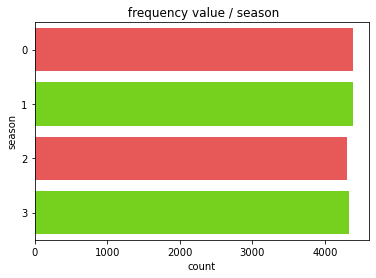

In [31]:
cole=["#FF4040","#76EE00","#FF4040","#76EE00"]
sns.countplot(y="season", data=my_data ,palette=cole).set(title=' frequency value / season')

[Text(0.5, 1.0, 'distribution of the count')]

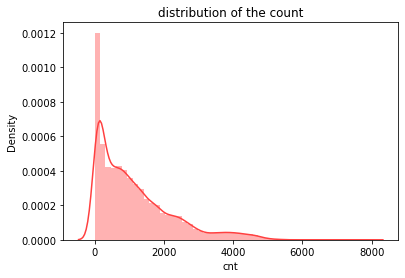

In [32]:
#let's look at the distribution of the count 
sns.distplot(my_data['cnt'], label='count',color="#FF4040").set(title='distribution of the count')

[Text(0.5, 1.0, 'frequency value / weather code')]

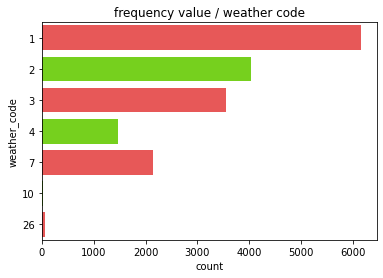

In [33]:
cole=["#FF4040","#76EE00","#FF4040","#76EE00"]
sns.countplot(y="weather_code", data=my_data ,palette=cole).set(title='frequency value / weather code')

[Text(0.5, 1.0, 'frequency value / is_holiday')]

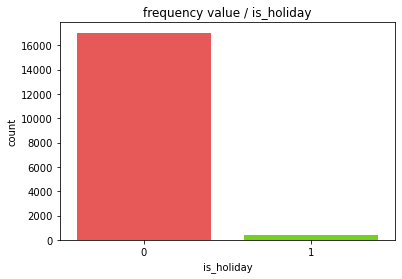

In [34]:
cole=["#FF4040","#76EE00","#FF4040","#76EE00"]
sns.countplot(x="is_holiday", data=my_data, palette=cole).set(title='frequency value / is_holiday')

[Text(0.5, 1.0, 'frequency value / is_weekend')]

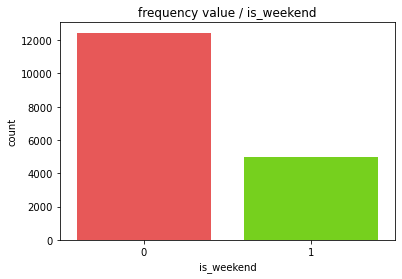

In [35]:
cole=["#FF4040","#76EE00","#FF4040","#76EE00"]
sns.countplot(x="is_weekend", data=my_data,palette=cole).set(title='frequency value / is_weekend')

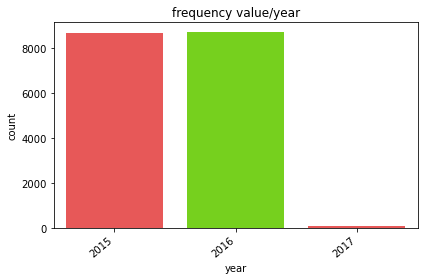

In [36]:
cole=["#FF4040","#76EE00","#FF4040","#76EE00"]
d=sns.countplot(x="year", data=my_data,palette=cole)
d.set_xticklabels(d.get_xticklabels(), rotation=40, ha="right")
plt.title("frequency value/year")


plt.tight_layout()
plt.show()

[Text(0.5, 1.0, 'frequency value/day of week')]

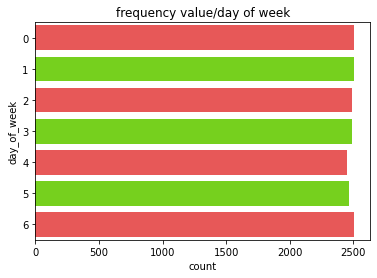

In [37]:
cole=["#FF4040","#76EE00","#FF4040","#76EE00"]
sns.countplot(y="day_of_week", data=my_data,palette=cole).set(title='frequency value/day of week')

# <a name=#EDA2> Exploratory Date Analysis(muli-varible-relationships)</a>

[Text(0.5, 1.0, 'The effect of the seasons on the number of bike rides ')]

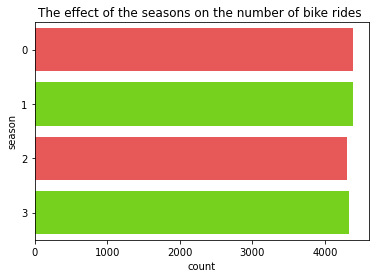

In [38]:
sns.countplot(y="season", data=my_data,palette=cole).set(title='The effect of the seasons on the number of bike rides ')

[Text(0.5, 1.0, 'The effect of the weather code on the number of bike rides')]

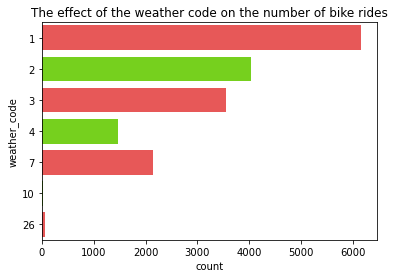

In [39]:
sns.countplot(y="weather_code", data=my_data,palette=cole).set(title='The effect of the weather code on the number of bike rides')

[Text(0.5, 1.0, 'The effect of the holiday on the number of bike rides')]

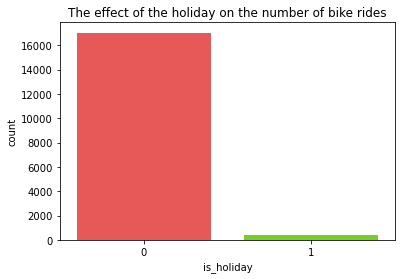

In [40]:
sns.countplot(x="is_holiday", data=my_data,palette=cole).set(title='The effect of the holiday on the number of bike rides')

[Text(0.5, 1.0, 'The effect of the weekend on the number of bike rides')]

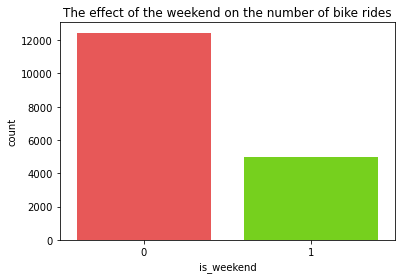

In [41]:
sns.countplot(x="is_weekend", data=my_data,palette=cole).set(title='The effect of the weekend on the number of bike rides')

[Text(0.5, 1.0, 'The effect of the day of week on the number of bike rides')]

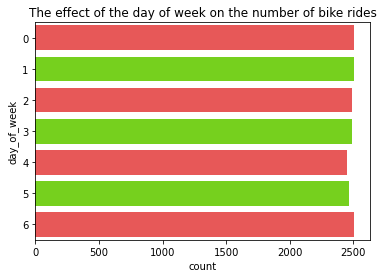

In [42]:
sns.countplot(y="day_of_week", data=my_data,palette=cole).set(title='The effect of the day of week on the number of bike rides')

<AxesSubplot:xlabel='season', ylabel='cnt'>

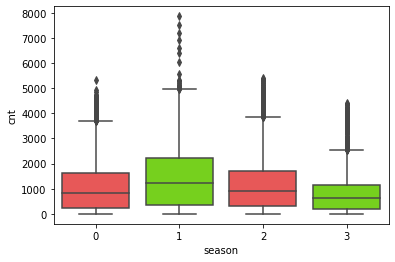

In [43]:
#outliers of the cnt
sns.boxplot(data=my_data,x="season",y="cnt",palette=cole)

In [44]:
infolimt(my_data.cnt)

Interquartile range of the cnt is: 1414.75 and the upper lmit is  2367230.4375 and the lower lmit is 361468.625


out in the dataset is [3960, 3904, 3828, 3835, 3841, 3818, 3803, 3807, 3886, 4033, 4053, 4125, 3889, 3864, 3858, 4196, 4144, 4062, 4246, 4446, 4492, 4211, 3868, 4220, 4080, 3904, 4628, 4148, 4143, 4443, 4267, 4069, 4437, 4453, 3794, 4069, 4283, 3911, 4098, 4227, 4023, 4059, 4413, 3988, 4103, 4675, 4129, 4207, 4101, 3848, 4379, 4428, 4395, 3810, 3966, 3972, 4018, 3960, 4348, 4118, 4010, 4302, 3904, 4183, 4607, 3891, 4096, 4581, 4322, 4365, 3995, 4507, 4615, 3823, 4694, 4091, 4177, 4723, 4204, 4183, 4212, 4447, 4137, 4050, 4749, 4209, 4298, 4803, 4274, 4328, 4622, 4094, 4000, 4137, 3934, 3867, 3840, 4685, 4102, 4252, 4568, 4263, 4215, 4543, 4002, 4092, 4009, 3807, 4393, 4464, 4727, 4829, 4657, 4930, 4779, 4617, 4604, 4641, 4193, 4084, 4412, 4191, 4549, 4501, 4470, 4867, 4351, 4346, 4702, 5560, 4721, 5309, 7531, 4832, 4076, 6033, 7860, 6913, 4654, 4496, 4453, 3836, 4600, 4265, 4218, 4188, 4037, 4686, 4319, 4375, 4204, 4115, 4223, 3880, 4618, 4666, 4753, 4654, 4148, 4307, 4536, 4242, 4079,

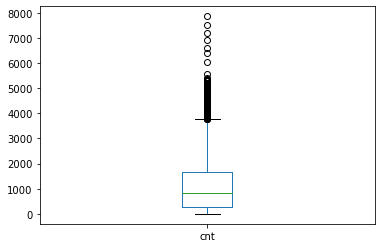

In [45]:
outliers_cnt = dealing_out_of_outliers(my_data.cnt)

In [46]:
# I will drop the outliers
s=my_data[my_data.season ==0]
s[(s.cnt==0) ^ (s.cnt<0)]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
2015,0,10.5,8.5,77.0,33.0,7,0,1,0,2015,3,29,6,1


In [47]:
# I will drop the outliers
s=my_data[my_data.season ==1]
s[(s.cnt==0) ^ (s.cnt<0)]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour


In [48]:
# I will drop the outliers
s=my_data[my_data.season ==2]
s[(s.cnt==0) ^ (s.cnt<0)]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour


In [49]:
# I will drop the outliers
s=my_data[my_data.season ==3]
s[(s.cnt==0) ^ (s.cnt<0)]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour


In [50]:
#drop row with index 

my_data.drop(labels=None, axis=0, index=2015, columns=None, level=None, inplace=True, errors='raise')

In [51]:
my_data.shape

(17413, 14)

<AxesSubplot:xlabel='season', ylabel='wind_speed'>

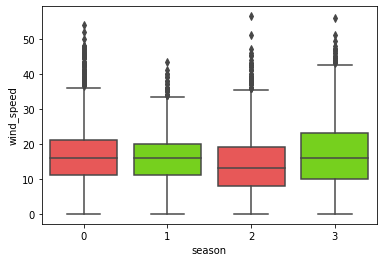

In [52]:
#outliers of the wind_speed
sns.boxplot(data=my_data,x="season",y="wind_speed",palette=cole)

In [53]:
infolimt(my_data.wind_speed)

Interquartile range of the cnt is: 10.5 and the upper lmit is  231.0 and the lower lmit is 89.25


out in the dataset is [37.0, 41.0, 44.0, 41.0, 40.0, 41.5, 39.0, 40.0, 40.5, 41.0, 40.0, 48.0, 41.0, 42.5, 41.5, 38.0, 42.5, 37.0, 39.0, 38.0, 39.0, 40.0, 40.0, 40.0, 44.5, 45.0, 37.0, 40.0, 41.5, 38.0, 37.0, 37.0, 38.0, 39.0, 37.0, 43.0, 44.5, 45.5, 40.0, 38.0, 39.0, 47.0, 47.0, 38.5, 40.5, 37.0, 37.0, 40.0, 42.5, 46.0, 43.0, 48.0, 46.0, 44.5, 45.5, 48.0, 47.5, 46.5, 48.0, 47.0, 42.5, 44.5, 42.5, 38.0, 38.0, 37.0, 39.0, 38.0, 38.0, 42.5, 43.5, 44.5, 41.5, 42.5, 43.5, 41.0, 37.0, 38.0, 38.0, 40.5, 42.0, 38.0, 38.0, 37.0, 37.0, 38.0, 46.0, 40.0, 38.0, 41.0, 43.5, 40.0, 39.0, 37.0, 37.0, 38.0, 40.0, 39.0, 43.0, 40.0, 37.0, 38.0, 42.0, 38.0, 42.0, 41.0, 38.0, 42.5, 38.5, 37.0, 45.5, 51.0, 56.5, 41.0, 44.0, 38.0, 37.0, 37.0, 38.0, 39.0, 42.5, 43.0, 45.0, 46.0, 47.0, 39.0, 39.0, 38.0, 38.0, 37.0, 38.0, 39.0, 39.0, 39.5, 38.0, 40.0, 37.0, 38.0, 45.0, 42.5, 41.5, 38.0, 38.0, 38.0, 40.0, 40.0, 37.0, 37.0, 39.0, 44.0, 47.0, 43.0, 37.0, 38.0, 38.0, 37.0, 37.0, 37.0, 38.0, 38.0, 39.0, 37.0, 39.0,

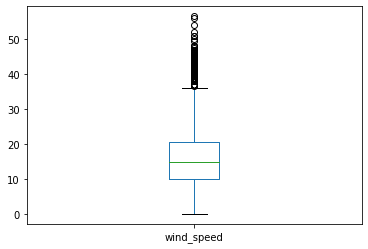

In [54]:
outliers_wind_speed = dealing_out_of_outliers(my_data.wind_speed)

In [55]:
# I won't do drop of the outliers
my_data[my_data.wind_speed<0]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour


<AxesSubplot:xlabel='season', ylabel='hum'>

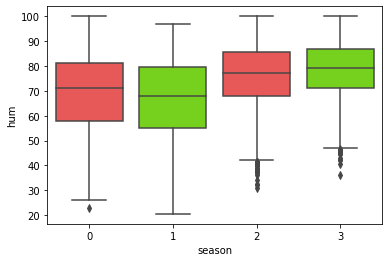

In [56]:
#outliers of the hum
sns.boxplot(data=my_data,x="season",y="hum",palette=cole)

In [57]:
infolimt(my_data.hum)

Interquartile range of the cnt is: 20.0 and the upper lmit is  1690.0 and the lower lmit is 1230.0


out in the dataset is [26.0, 27.0, 31.0, 32.0, 32.0, 29.5, 29.0, 29.0, 32.5, 32.0, 29.0, 29.0, 32.0, 29.0, 28.5, 32.0, 30.0, 27.0, 32.0, 30.5, 26.0, 24.0, 20.5, 26.0, 30.0, 26.0, 27.0, 29.0, 29.0, 32.0, 31.0, 28.0, 23.5, 25.0, 26.0, 26.5, 32.5, 32.0, 32.0, 28.0, 25.5, 23.5, 30.5, 32.0, 32.0, 32.0, 28.0, 32.5, 29.5, 26.0, 28.0, 23.0, 27.0, 29.0, 32.0, 29.0, 31.5, 31.0, 30.0, 30.0, 28.5, 32.0, 31.0, 32.0, 31.5, 26.0, 27.0, 26.0, 31.0, 32.0, 32.5]


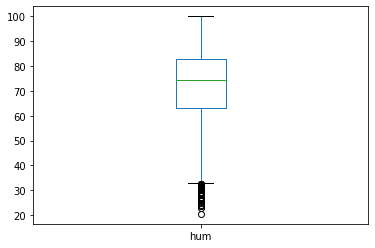

In [58]:
outliers_hum = dealing_out_of_outliers(my_data.hum)

In [59]:
# I won't do drop of the outliers
my_data[my_data.hum<0]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour


<AxesSubplot:xlabel='season', ylabel='t1'>

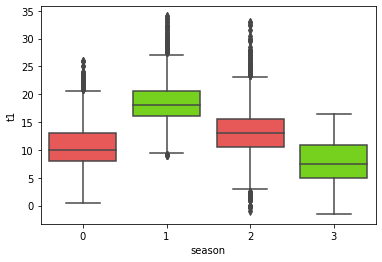

In [60]:
#outlayer of the t1
sns.boxplot(data=my_data,x="season",y="t1",palette=cole)

In [61]:
infolimt(my_data.t1)

Interquartile range of the cnt is: 8.0 and the upper lmit is  140.0 and the lower lmit is 52.0


out in the dataset is [28.5, 29.0, 28.5, 28.5, 30.0, 33.0, 32.0, 31.5, 33.0, 33.5, 33.5, 34.0, 34.0, 33.5, 31.5, 29.5, 28.5, 30.0, 30.0, 30.0, 29.0, 29.0, 28.5, 29.0, 29.0, 29.5, 30.5, 31.0, 32.0, 32.0, 32.0, 31.0, 28.5, 28.5, 29.5, 30.5, 30.0, 29.5, 28.5, 29.0, 29.5, 30.0, 30.0, 29.0, 28.5, 29.0, 30.0, 31.0, 32.0, 32.5, 32.5, 30.5, 29.0, 29.5, 30.5, 32.5, 33.0, 33.0, 32.5, 31.5, 30.0, 28.5, 30.0, 29.5]


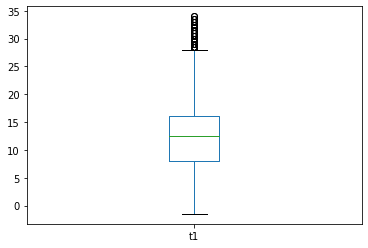

In [62]:
outliers_t1 = dealing_out_of_outliers(my_data.t1)

In [63]:
  # I won't do drop of the outliers
my_data[(my_data.t1>60) ^ (my_data.t1<-60)]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour


<AxesSubplot:xlabel='season', ylabel='t2'>

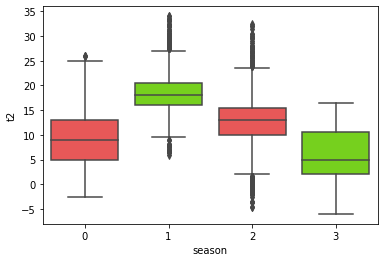

In [64]:
#outlayer of the t2
sns.boxplot(data=my_data,x="season",y="t2",palette=cole)

In [65]:
infolimt(my_data.t2)

Interquartile range of the cnt is: 10.0 and the upper lmit is  175.0 and the lower lmit is 45.0


out in the dataset is [33.0, 32.0, 31.5, 33.0, 33.5, 33.5, 34.0, 34.0, 33.5, 32.0, 32.0, 32.0, 32.0, 32.5, 32.5, 32.5, 32.0, 32.0, 31.5]


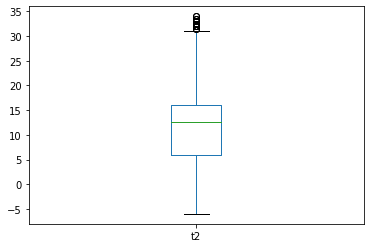

In [66]:
outliers_t2 = dealing_out_of_outliers(my_data.t2)

In [67]:
# I won't do drop of the outliers
my_data[(my_data.t2>60) ^ (my_data.t2< -60)]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour


Text(0.5, 1.0, 'The effect of the seasons on the number of polytheists')

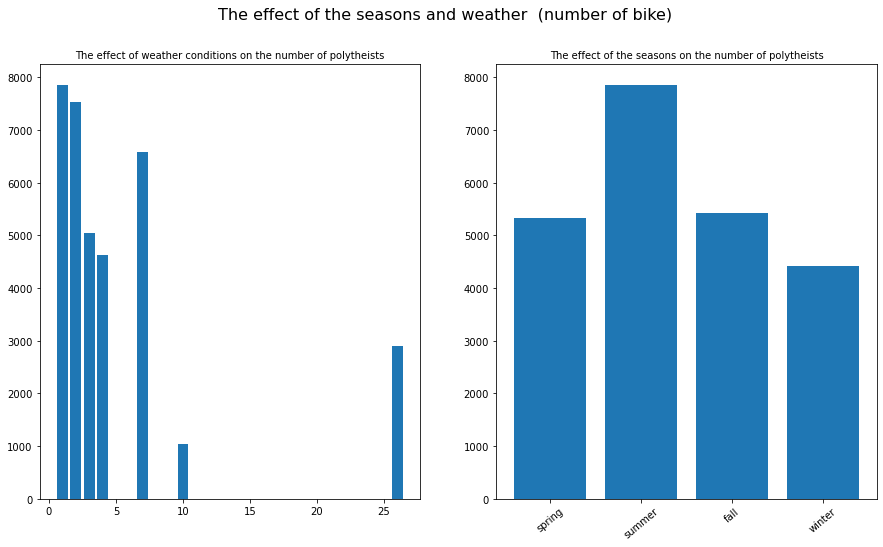

In [95]:
plt.figure(figsize=(15,8) )
plt.suptitle("The effect of the seasons and weather  (number of bike)",fontsize=16)



plt.subplot(1,2,1)
plt.bar(my_data.weather_code ,my_data.cnt)
plt.title("The effect of weather conditions on the number of polytheists",fontsize=10)


plt.subplot(1,2,2)
plt.bar(my_data.season,my_data.cnt)
ticks_x = np.linspace(0,3,4)
label = ['spring', 'summer', 'fall', 'winter']
plt.xticks(ticks_x, label, rotation=40)
plt.title("The effect of the seasons on the number of polytheists",fontsize=10)


Text(0.5, 1.0, 'The effect of the holiday on the number of polytheists')

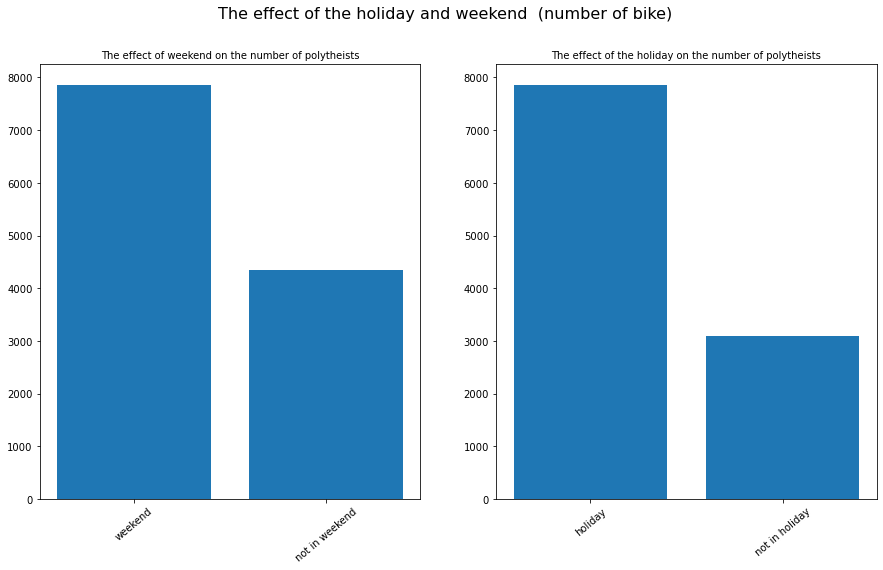

In [69]:
plt.figure(figsize=(15,8) )
plt.suptitle("The effect of the holiday and weekend  (number of bike)",fontsize=16)



plt.subplot(1,2,1)
plt.bar(my_data.is_weekend ,my_data.cnt)
ticks_x = np.linspace(0,1,2)
label = ['weekend', 'not in weekend']
plt.xticks(ticks_x, label, rotation=40)
plt.title("The effect of weekend on the number of polytheists",fontsize=10)


plt.subplot(1,2,2)
plt.bar(my_data.is_holiday,my_data.cnt)
ticks_x2 = np.linspace(0,1,2)
label2 = ['holiday', 'not in holiday']
plt.xticks(ticks_x2, label2, rotation=40)
plt.title("The effect of the holiday on the number of polytheists",fontsize=10)

<Figure size 2160x1440 with 0 Axes>

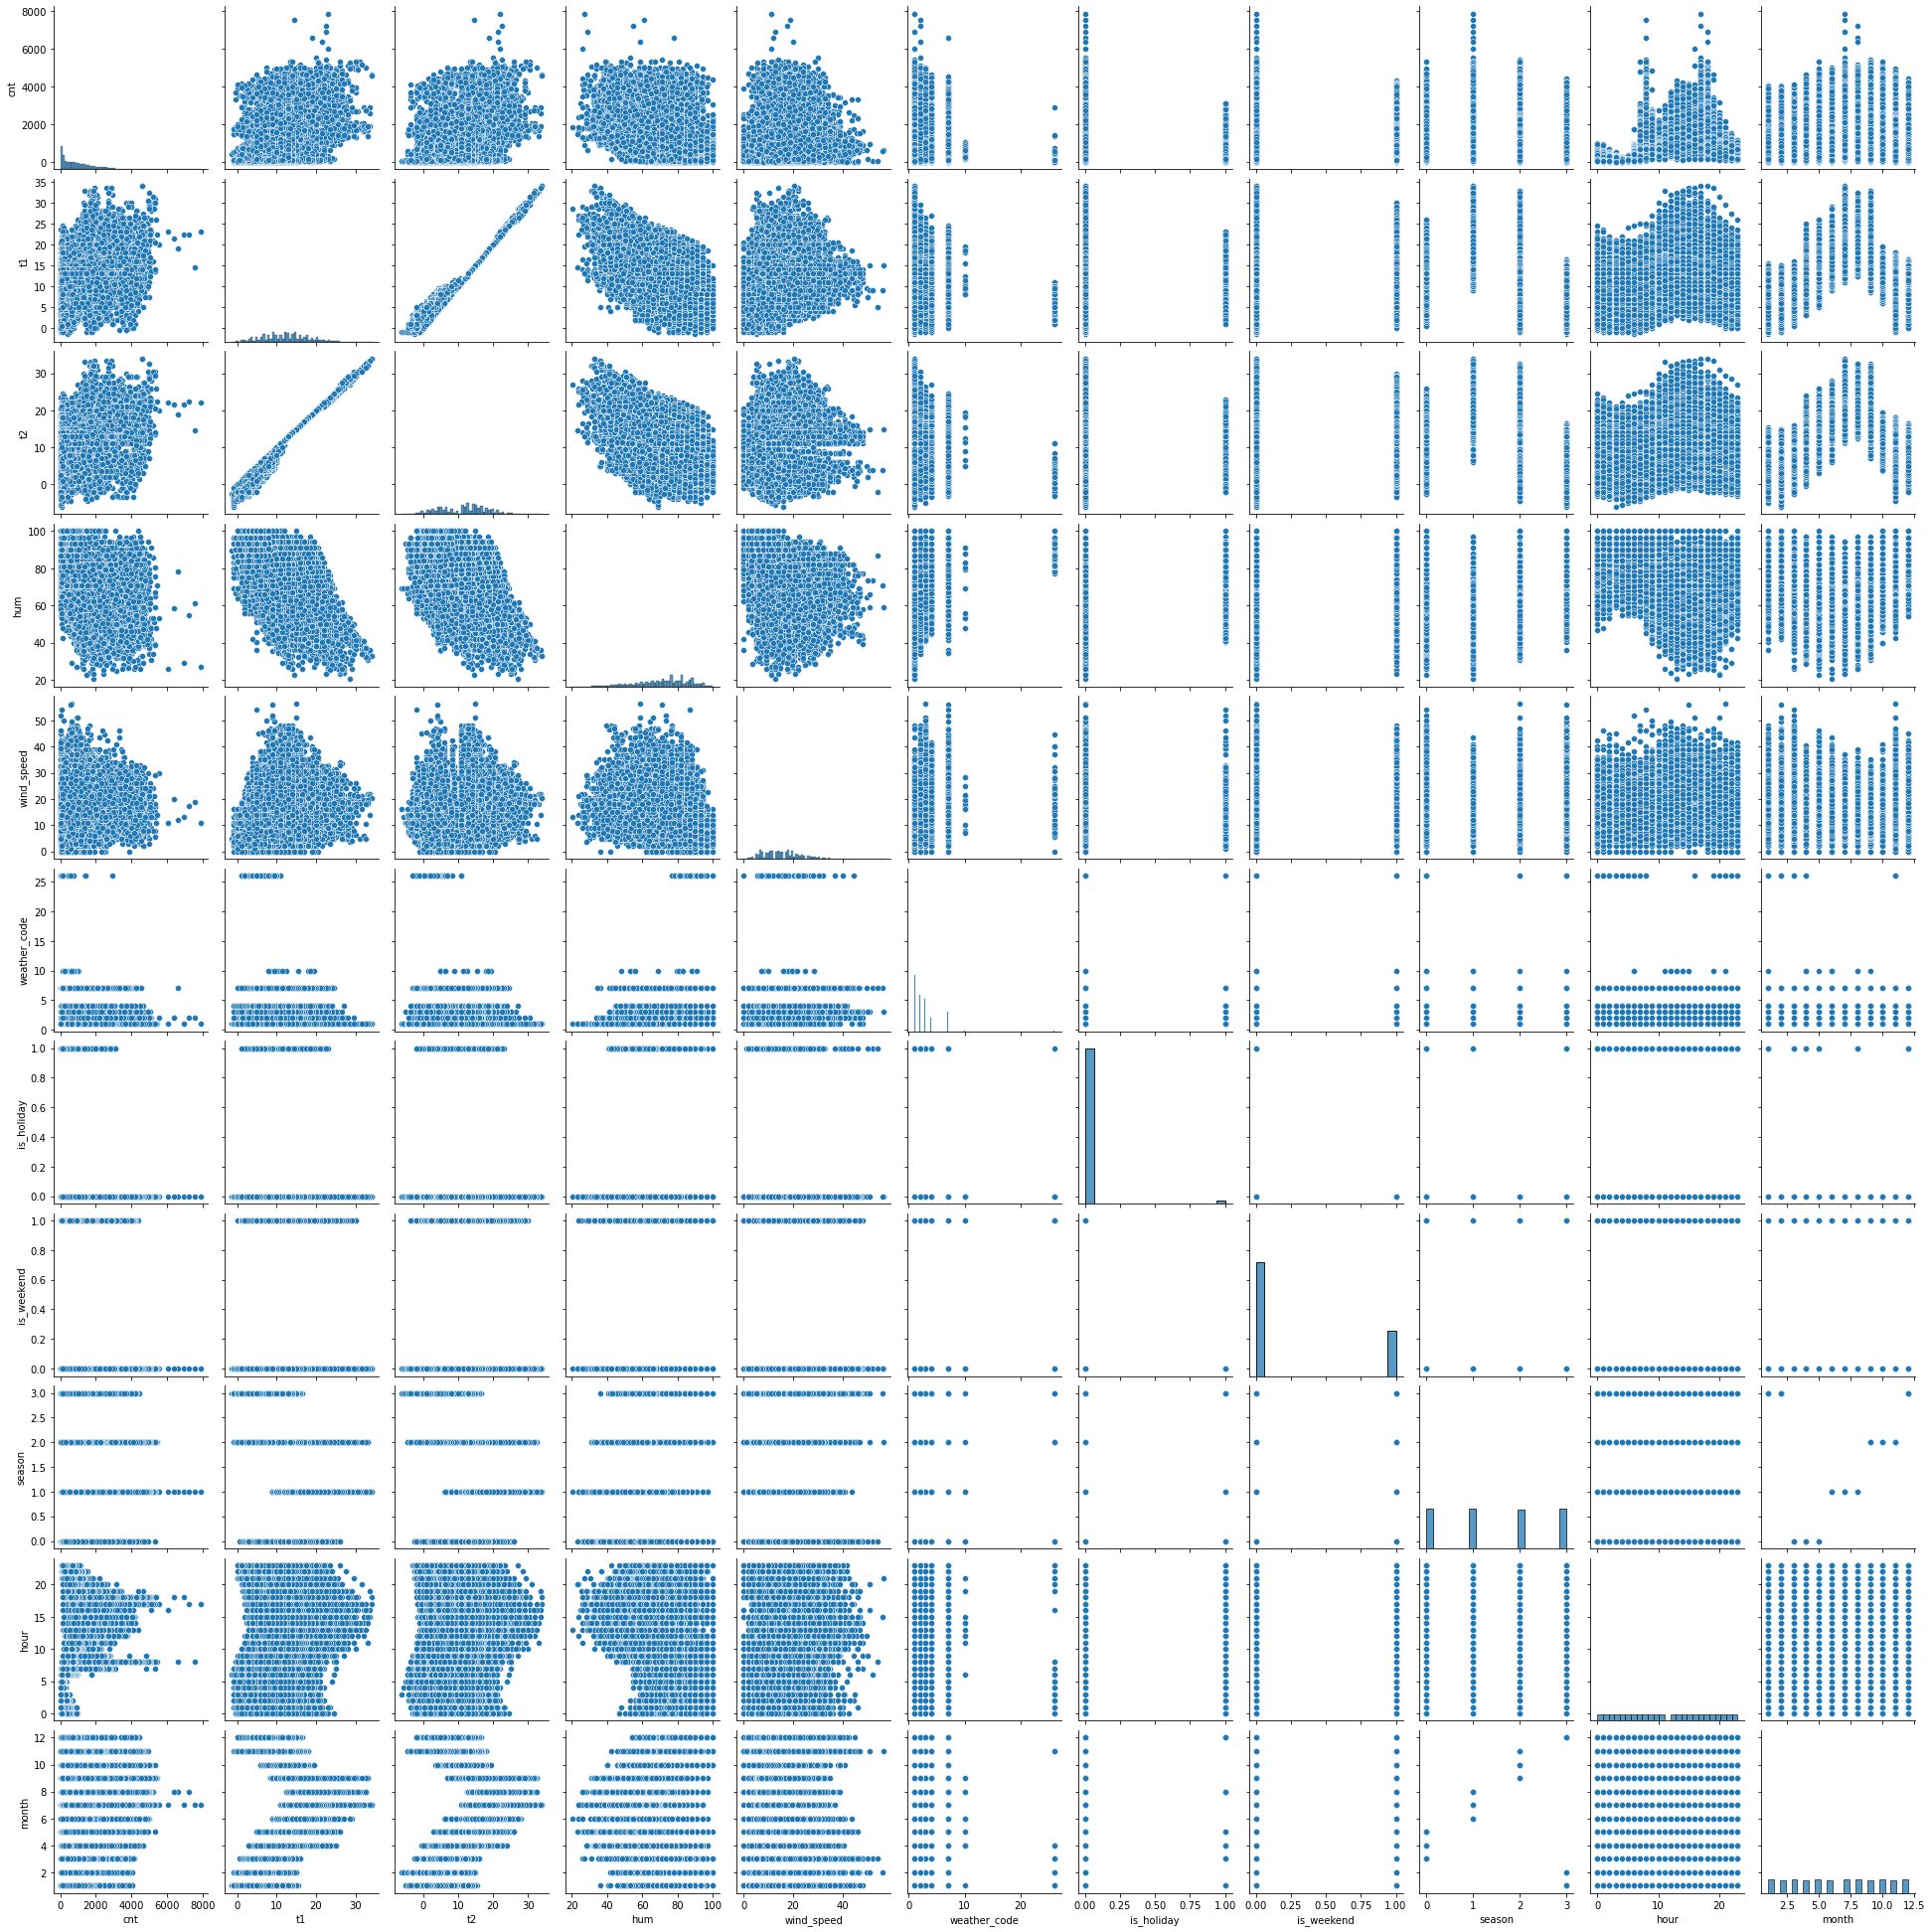

In [70]:
#let's plot everything in groups of two
plt.figure(figsize=(30,20))
sns.pairplot(my_data[['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season', 'hour', 'month']])
plt.show()

<AxesSubplot:>

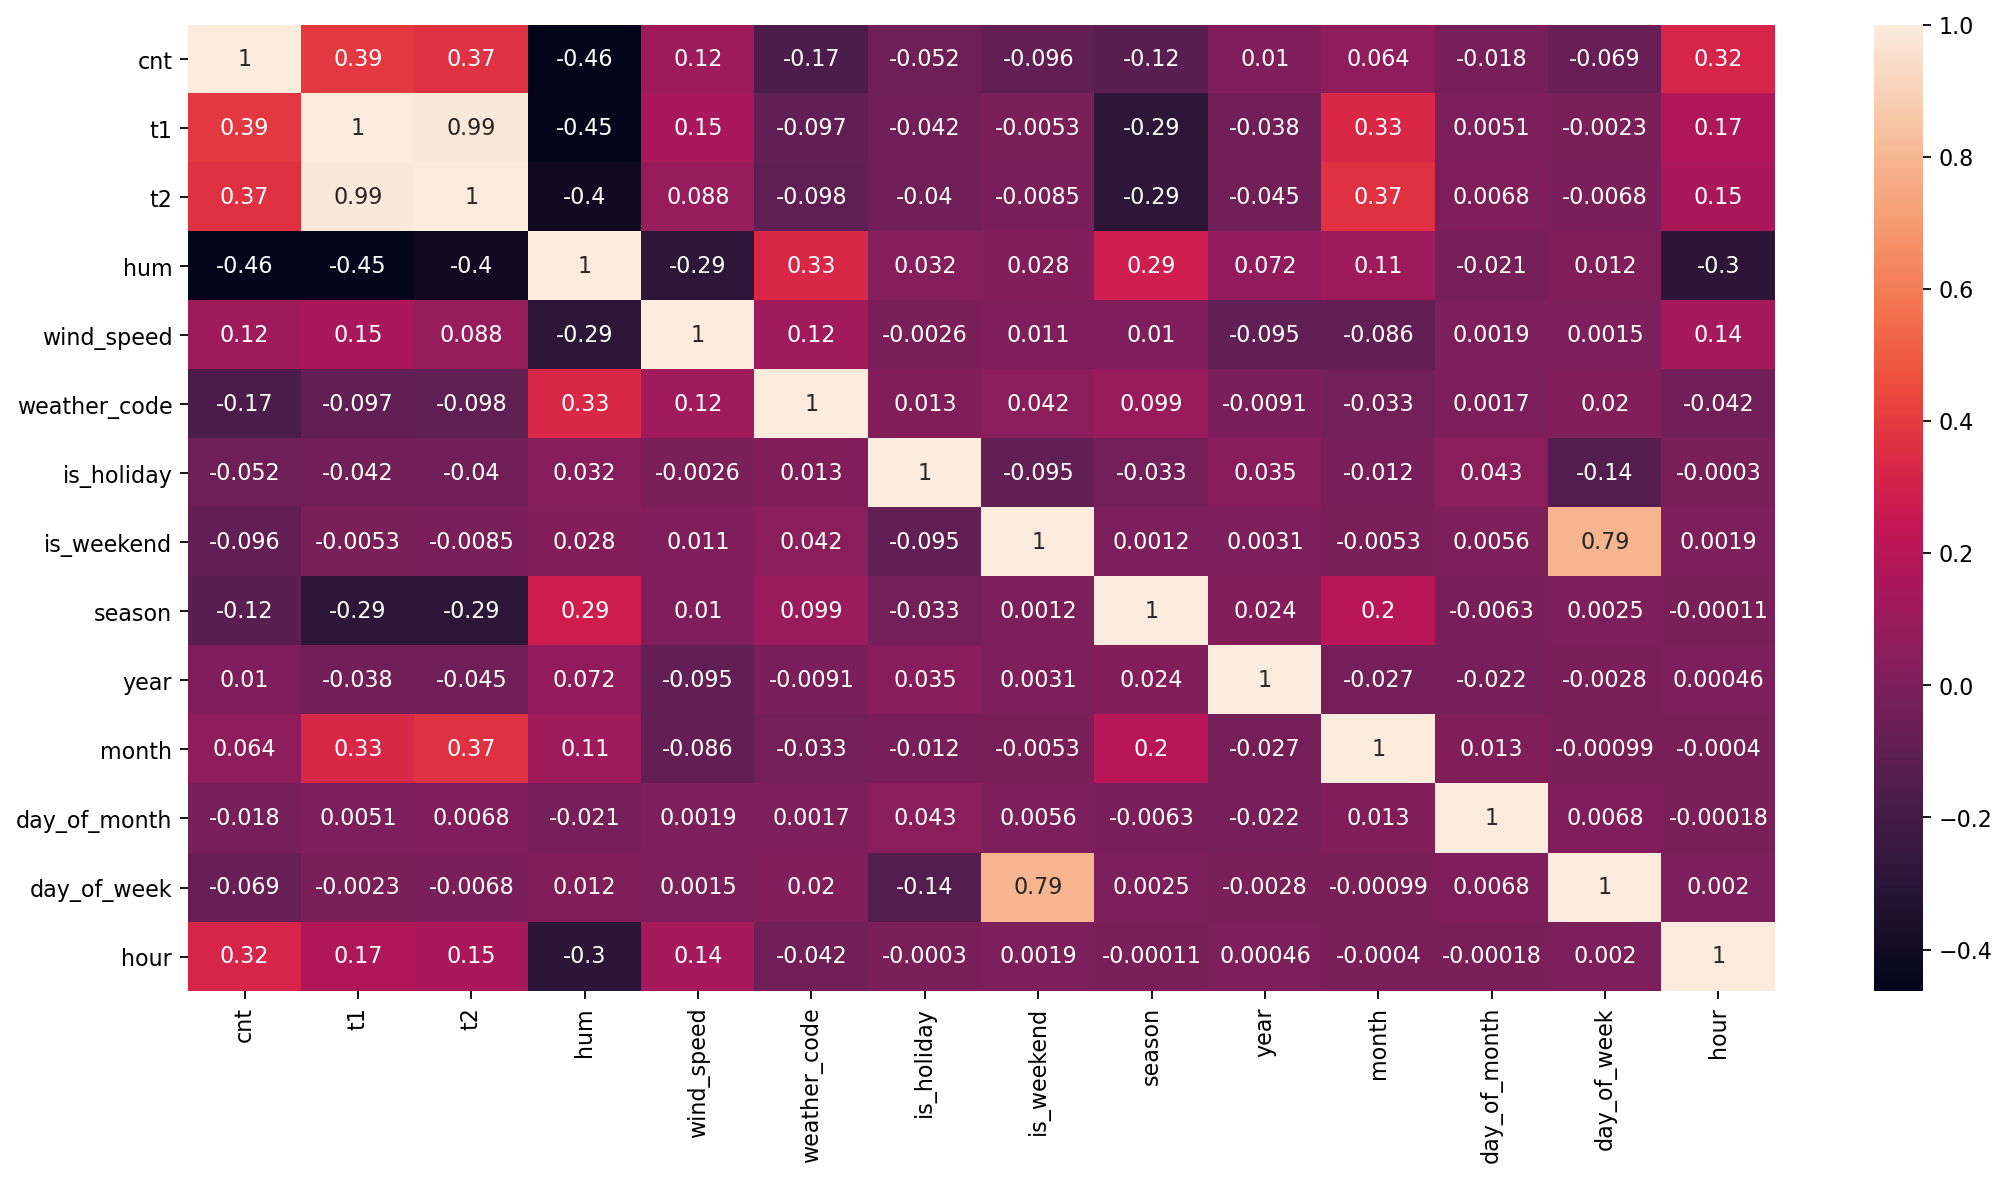

In [71]:
#to show all correlation betwan each columns

plt.figure(figsize=(16,8), dpi=160)
sns.heatmap(my_data.corr(),annot=True)

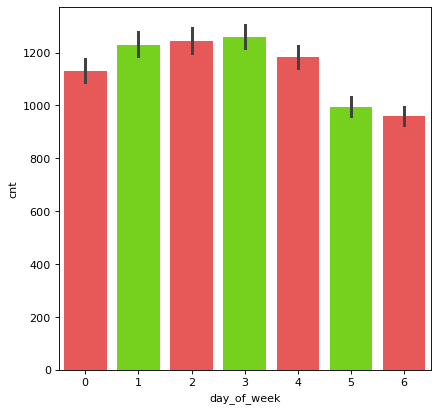

In [72]:
#let's see count in terms of months
plt.figure(figsize=(6,6), dpi=80)
sns.barplot(x="day_of_week", y="cnt", data=my_data,palette=cole);

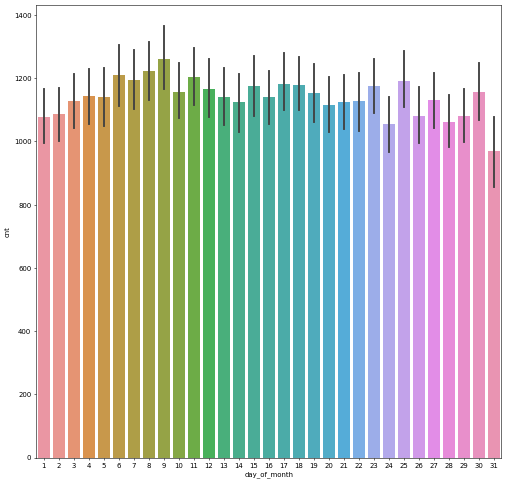

In [73]:
#let's see count in terms of months
plt.figure(figsize=(12,12), dpi=50)
sns.barplot(x="day_of_month", y="cnt", data=my_data);

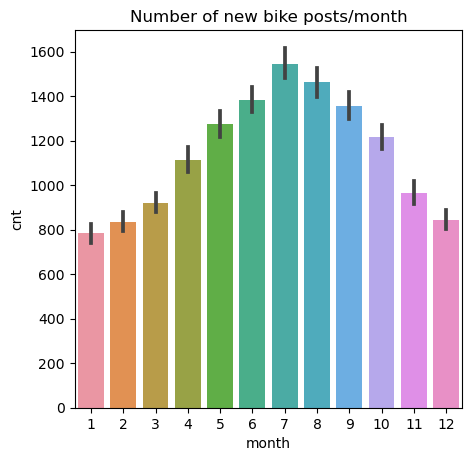

In [74]:
#let's see count in terms of months
plt.figure(figsize=(5,5), dpi=100)
sns.barplot(x="month", y="cnt", data=my_data ).set(title='Number of new bike posts/month');

 # <a name=#ques> Questions& Insights</a>

## uni-variabel 

<AxesSubplot:xlabel='is_holiday', ylabel='count'>

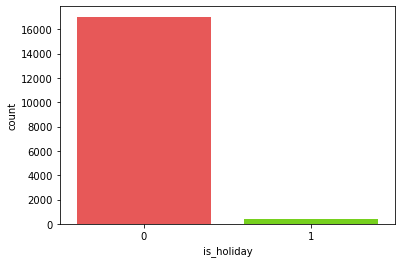

In [89]:
#Was the use of grades during the holidays more or not? yes

sns.countplot(x="is_holiday", data=my_data ,palette=cole)

In [76]:
#find what the weatherwas like when the polytheists (highest value)
my_data[my_data.cnt == my_data["cnt"].max()].head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
4470,7860,23.0,22.0,27.0,11.0,1,0,0,1,2015,7,9,3,17


In [77]:
#find what the day  when the polytheists (lowes value)
my_data[my_data.cnt == my_data["cnt"].min()].head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
16361,9,6.0,3.5,93.0,12.0,7,0,0,2,2016,11,21,0,3


In [78]:
#find what the day  when the polytheists (lowes value)
my_data[my_data.cnt == my_data["cnt"].min()].day_of_month

16361    21
Name: day_of_month, dtype: int64

## multi-variabel 

Text(0, 0.5, 'number of rides per day')

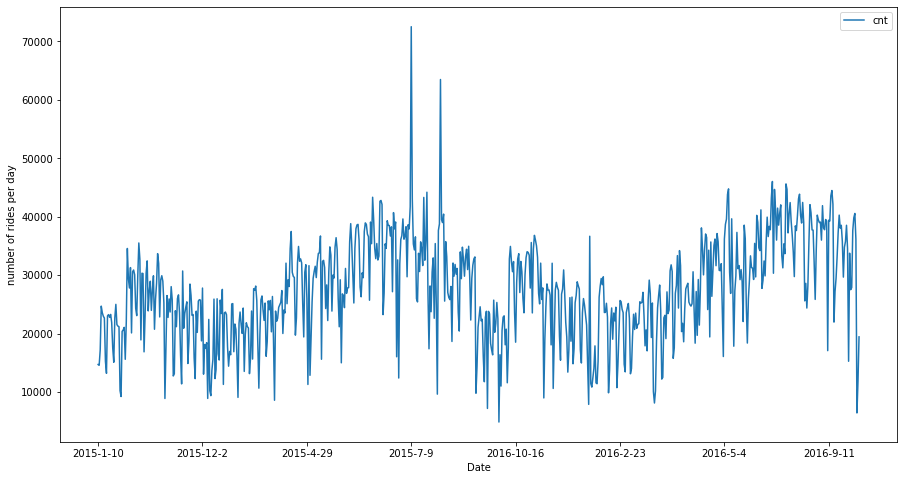

In [79]:
# let's see how many count they have on each day
my_data['date_year']  = my_data[[ 'year', 'month','day_of_month']].astype(str).apply(lambda x: '-'.join(x), axis=1)
plot_data = my_data[[ 'cnt', 'date_year']]
ax = plot_data.groupby('date_year').sum().plot(figsize=(15,8))
ax.set_xlabel("Date")
ax.set_ylabel("number of rides per day")

In [80]:
#Was there any people using the bike in freezing fog ?no
my_data[(my_data.weather_code==94) & (my_data.cnt>0)]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour,date_year


In [81]:
#find sum polytheists have in each season (0=spring)

HES0=my_data[my_data.season ==0]
HES0.cnt.sum()

4850236

In [82]:
#find sum polytheists have in each season (1=summer)

HES1=my_data[my_data.season ==1]
HES1.cnt.sum()

6424609

In [83]:
#find sum polytheists have in each season (2=fall)
HES2=my_data[my_data.season ==2]
HES2.cnt.sum()

5073040

In [84]:
#find sum polytheists have in each season(3=winter)
my_data[my_data.season ==3].cnt.sum()

3558087

In [85]:
#find the num of person (actual tempe = feeling tempe)
my_data[my_data.t1 == my_data.t2].cnt.sum()

13981690

In [86]:
#desplay the person (actual tempe = feeling tempe)
my_data[my_data.t1 != my_data.t2]

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour,date_year
0,182,3.0,2.0,93.0,6.0,3,0,1,3,2015,1,4,6,0,2015-1-4
1,138,3.0,2.5,93.0,5.0,1,0,1,3,2015,1,4,6,1,2015-1-4
4,47,2.0,0.0,93.0,6.5,1,0,1,3,2015,1,4,6,4,2015-1-4
6,51,1.0,-1.0,100.0,7.0,4,0,1,3,2015,1,4,6,6,2015-1-4
7,75,1.0,-1.0,100.0,7.0,4,0,1,3,2015,1,4,6,7,2015-1-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,1042,5.0,1.0,81.0,19.0,3,0,0,3,2017,1,3,1,19,2017-1-3
17410,541,5.0,1.0,81.0,21.0,4,0,0,3,2017,1,3,1,20,2017-1-3
17411,337,5.5,1.5,78.5,24.0,4,0,0,3,2017,1,3,1,21,2017-1-3
17412,224,5.5,1.5,76.0,23.0,4,0,0,3,2017,1,3,1,22,2017-1-3


# <a name=#con> Conculsion</a>

Text(0.5, 1.0, 'The effect of the seasons on the number of polytheists')

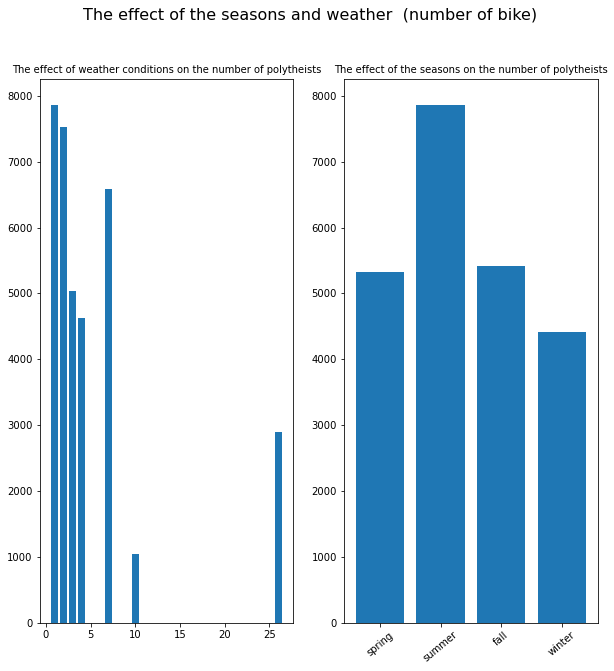

In [87]:
#There is a strong influence of seasons and weather on the number of subscribers
plt.figure(figsize=(10,10) )
plt.suptitle("The effect of the seasons and weather  (number of bike)",fontsize=16)



plt.subplot(1,2,1)
plt.bar(my_data.weather_code ,my_data.cnt)
plt.title("The effect of weather conditions on the number of polytheists",fontsize=10)


plt.subplot(1,2,2)
plt.bar(my_data.season,my_data.cnt)
ticks_x = np.linspace(0,3,4)
label = ['spring', 'summer', 'fall', 'winter']
plt.xticks(ticks_x, label, rotation=40)
plt.title("The effect of the seasons on the number of polytheists",fontsize=10)

Text(0.5, 1.0, 'The effect of the holiday on the number of polytheists')

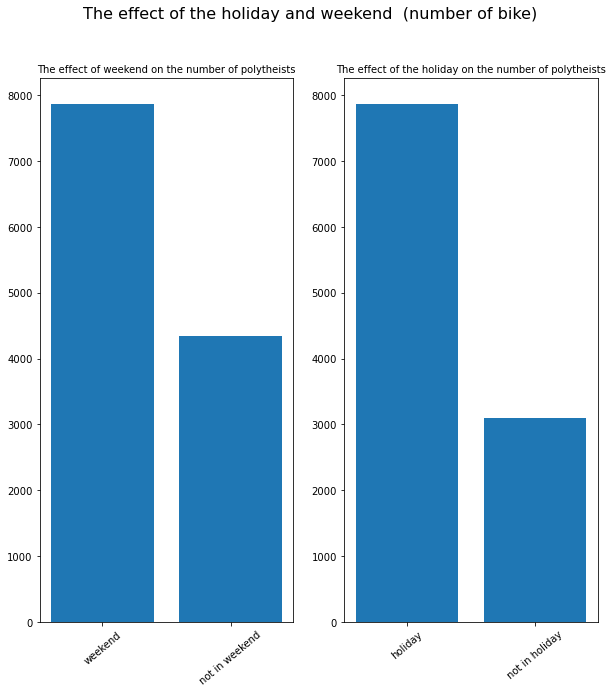

In [94]:
#There is a strong effect between the vacation on the number of subscribers

plt.figure(figsize=(10,10))
plt.suptitle("The effect of the holiday and weekend  (number of bike)",fontsize=16)



plt.subplot(1,2,1)
plt.bar(my_data.is_weekend ,my_data.cnt)
ticks_x = np.linspace(0,1,2)
label = ['weekend', 'not in weekend']
plt.xticks(ticks_x, label, rotation=40)
plt.title("The effect of weekend on the number of polytheists",fontsize=10)


plt.subplot(1,2,2)
plt.bar(my_data.is_holiday,my_data.cnt)
ticks_x2 = np.linspace(0,1,2)
label2 = ['holiday', 'not in holiday']
plt.xticks(ticks_x2, label2, rotation=40)
plt.title("The effect of the holiday on the number of polytheists",fontsize=10)
